In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/exchangeRateIATA.csv", sep=";")
df["dates"] = pd.to_datetime(df["dates"])

### Bandas de Bollinger (Soporte y Resistencia)

#### Soporte
Un soporte es un nivel de precio ubicado por debajo del actual, donde se anticipa que la demanda es lo suficientemente fuerte como para detener o revertir una tendencia bajista, actuando como un "suelo" que sostiene el precio

#### Resistencia
Una resistencia es un nivel de precio situado por encima del actual, donde se espera que la presión de venta sea suficiente para detener o revertir una tendencia alcista, funcionando como un "techo" que limita el avance del precio.

In [43]:
def bollinger_bands(
    serie: pd.Series,
    windows_size: int = 20,
    num_std_dev: int = 2
) -> tuple[pd.Series]:

    moving_average = serie.rolling(window=windows_size).mean()
    std = serie.rolling(window=windows_size).std()

    upper_band = moving_average + (num_std_dev * std)
    lower_band = moving_average - (num_std_dev * std)

    return (upper_band, moving_average, lower_band)

In [11]:
bollinger_bands(df["iata"])[0]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2849    950.758859
2850    951.444906
2851    953.896000
2852    955.906927
2853    956.746217
Name: iata, Length: 2854, dtype: float64

In [10]:
df.shape[]

(2854, 2)

In [17]:
upper, moving_average, lower = bollinger_bands(df["iata"])

In [18]:
df["bollinger_upper"] = upper
df["bollinger_ma"] = moving_average
df["bollinger_lower"] = lower

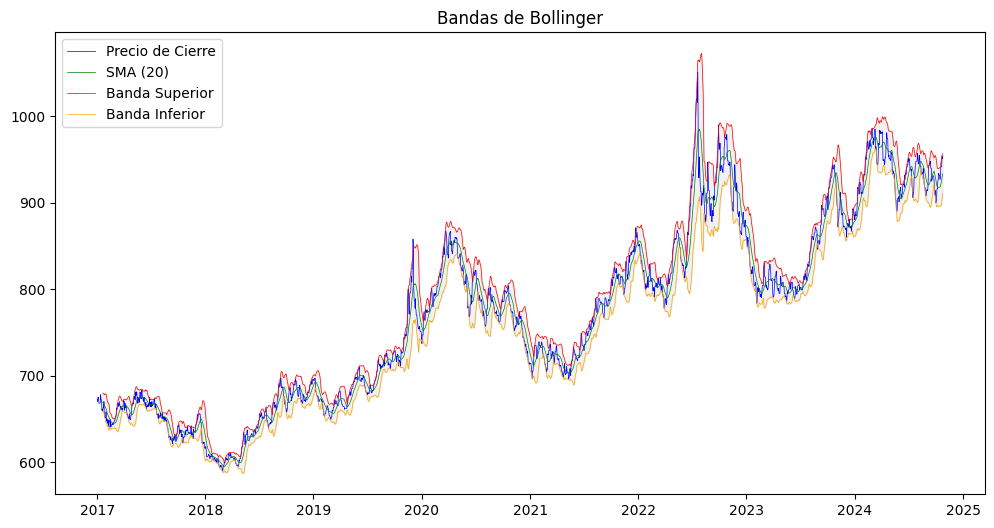

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['dates'], df['iata'], label='Precio de Cierre', color='blue', linewidth=0.5)
plt.plot(df['dates'], df['bollinger_ma'], label='SMA (20)', color='green', linewidth=0.5)
plt.plot(df['dates'], df['bollinger_upper'], label='Banda Superior', color='red', linewidth=0.5)
plt.plot(df['dates'], df['bollinger_lower'], label='Banda Inferior', color='orange', linewidth=0.5)
plt.fill_between(df['dates'], df['bollinger_upper'], df['bollinger_lower'], color='lightgray', alpha=0.3)

plt.title('Bandas de Bollinger')
plt.legend()
plt.show()


In [35]:
df["upper_deviation"] = df["bollinger_upper"] - df["bollinger_ma"]
df["lower_deviation"] = df["bollinger_lower"] - df["bollinger_ma"]

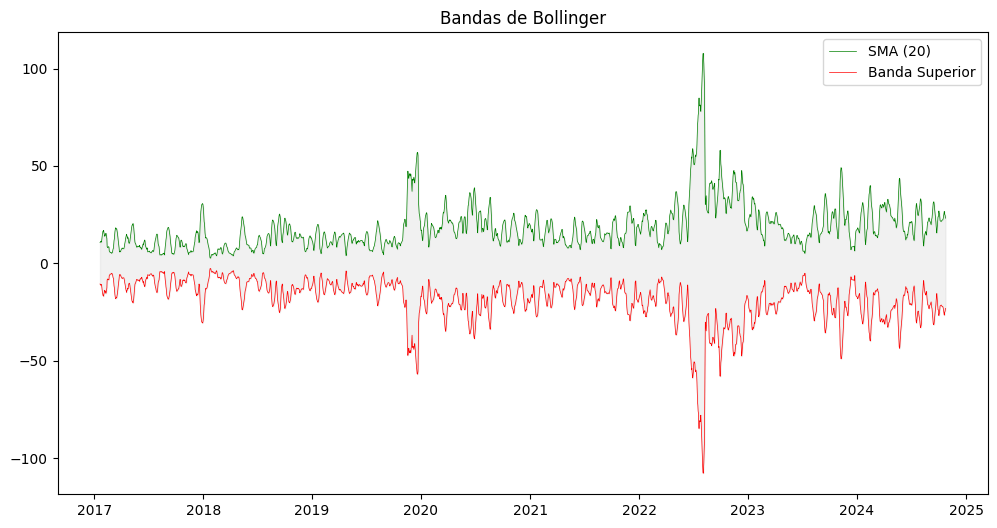

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df['dates'], df['upper_deviation'], label='SMA (20)', color='green', linewidth=0.5)
plt.plot(df['dates'], df['lower_deviation'], label='Banda Superior', color='red', linewidth=0.5)
plt.fill_between(df['dates'], df['upper_deviation'], df['lower_deviation'], color='lightgray', alpha=0.3)

plt.title('Bandas de Bollinger')
plt.legend()
plt.show()

In [39]:
df['upper_deviation'][-5:]

2849    26.658859
2850    25.244906
2851    24.996000
2852    24.506927
2853    23.146217
Name: upper_deviation, dtype: float64

In [41]:
df['lower_deviation'][-5:]

2849   -26.658859
2850   -25.244906
2851   -24.996000
2852   -24.506927
2853   -23.146217
Name: lower_deviation, dtype: float64

In [44]:
df.tail()

,dates,iata,bollinger_upper,bollinger_lower,bollinger_ma,upper_deviation,lower_deviation
2849,2024-10-20,942,950.758859,897.441141,924.1,26.658859,-26.658859
2850,2024-10-21,942,951.444906,900.955094,926.2,25.244906,-25.244906
2851,2024-10-22,954,953.896000,903.904000,928.9,24.996000,-24.996000
2852,2024-10-23,954,955.906927,906.893073,931.4,24.506927,-24.506927
2853,2024-10-24,951,956.746217,910.453783,933.6,23.146217,-23.146217
